In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
from sklearn import metrics

In [2]:
#bikes=pd.read_csv("attachment_attachment_bikeshare_lyst3839.csv")
bikes=pd.read_csv("attachment_attachment_bikeshare_lyst3839.csv",index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


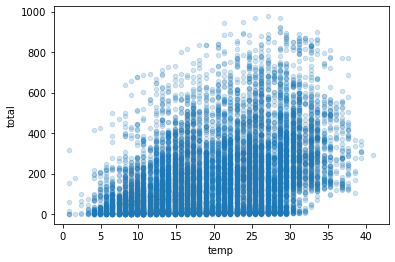

In [3]:
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)
bikes.info()

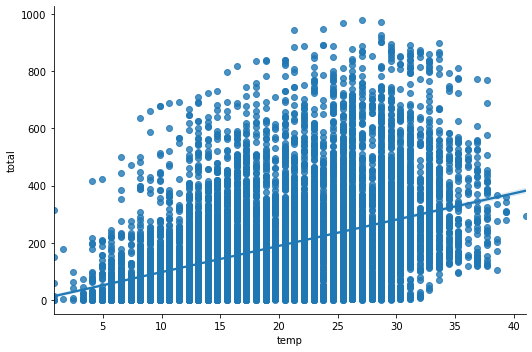

In [4]:
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.8})

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bikes.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total'],
      dtype='object')

In [20]:
df_output=bikes['total']
df_input=bikes[['temp', 'season', 'weather', 'humidity']]
#feature_columns=['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed',]
feature_columns = ['temp', 'season', 'weather', 'humidity']

In [21]:
reg =linear_model.LinearRegression()
###### Split size in train and Test
size=.8
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=123,test_size=size)
#print("The capital of {0:s} is {1:s}".format("Ontario","Toronto"))
#print("The No of Rows Columns in X_Train is which is based on test_size{0:s} given earlier {1:f}".format(size,X_train.shape))
print("The No of Rows Columns in X_Train is which is based on test_size.8 given earlier ",X_train.shape)
print("The No of Rows Columns in X_test is which is based on test_size .8 given earlier ",X_test.shape)
print("The No of Rows Columns in y_train is which is based on test_size.8 given earlier ",y_train.shape)
print("The No of Rows Columns in y_test is which is based on test_size .8 given earlier ",y_test.shape)

The No of Rows Columns in X_Train is which is based on test_size.8 given earlier  (2177, 4)
The No of Rows Columns in X_test is which is based on test_size .8 given earlier  (8709, 4)
The No of Rows Columns in y_train is which is based on test_size.8 given earlier  (2177,)
The No of Rows Columns in y_test is which is based on test_size .8 given earlier  (8709,)


In [22]:
reg.fit(X_test,y_test)
print("reg.coef=>",reg.coef_,"reg.intercept_=>",reg.intercept_)

reg.coef=> [ 7.81653281 23.19297072  4.98560859 -3.08827068] reg.intercept_=> 159.1962807393844


In [23]:
print("reg.coef=>",reg.coef_,"reg.intercept_=>",reg.intercept_)
print(list(zip(feature_columns, reg.coef_)))
print("###########################")
print("Bikes Pridction")
print(reg.predict([[10,1,80,100]]))

reg.coef=> [ 7.81653281 23.19297072  4.98560859 -3.08827068] reg.intercept_=> 159.1962807393844
[('temp', 7.816532805469851), ('season', 23.192970719994676), ('weather', 4.985608592171586), ('humidity', -3.088270682803813)]
###########################
Bikes Pridction
[350.57619861]


In [24]:
10*7.816532805469851 + 23.192970719994676 + 80*4.985608592171586+ 100*-3.088270682803813 + 159.1962807393844

350.5761986074232

In [25]:
print(reg.predict([[0,0,0,0]]))

[159.19628074]


In [26]:
# hour as a categorical feature
bikes['hour'] = bikes.index.hour
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

In [28]:
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [29]:
bikes['daytime']

datetime
2011-01-01 00:00:00    0
2011-01-01 01:00:00    0
2011-01-01 02:00:00    0
2011-01-01 03:00:00    0
2011-01-01 04:00:00    0
                      ..
2012-12-19 19:00:00    1
2012-12-19 20:00:00    1
2012-12-19 21:00:00    0
2012-12-19 22:00:00    0
2012-12-19 23:00:00    0
Name: daytime, Length: 10886, dtype: int32

In [53]:
def train_test_rmse(feature_columns):
    X = bikes[feature_columns]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    reg =linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [54]:
from sklearn.model_selection import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse_svm(feature_columns):
    X = bikes[feature_columns]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    svm = SVR(gamma='auto', C=1, kernel='linear',epsilon=0.0001)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [55]:
print (train_test_rmse(['hour']))
print (train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print (train_test_rmse(['daytime']))

165.67174264111398
129.58680814999
144.8911636023794


In [57]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')
# print 5 random rows
season_dummies.sample(n=5, random_state=1)
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)
# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In [58]:
bikes = pd.concat([bikes, season_dummies], axis=1)

In [59]:
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,daytime,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,...,0,0,0,0,0,0,1,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,...,0,0,0,0,0,0,0,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,...,0,0,0,0,0,0,1,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,...,0,0,0,0,0,0,1,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_columns]
y = bikes.total
reg =linear_model.LinearRegression()
reg.fit(X, y)
list(zip(feature_columns, reg.coef_))

[('temp', 7.864824992477459),
 ('season', 22.538757532466835),
 ('weather', 6.670302035923789),
 ('humidity', -3.118873382396501)]